### Assignment: Plotting surface currents

Throughout the book, we will be using the [NCEP Global Ocean Data Assimilation System (GODAS) datasets](https://psl.noaa.gov/data/gridded/data.godas.html) to explore the ocean currents and properties ourselves. We will do that using the `xarray` and `dask` packages for analysing NetCDF data, in combination with `cartopy` for plotting

First of all, make sure that you have `jupyter`, `xarray`, `dask`, `netcdf4` and `cartopy` installed in your conda environment.

Then, download the ['U component of current'](https://psl.noaa.gov/cgi-bin/db_search/DBListFiles.pl?did=98&tid=83478&vid=1918) and ['V component of current'](https://psl.noaa.gov/cgi-bin/db_search/DBListFiles.pl?did=98&tid=83478&vid=1920) from the GODAS website at https://psl.noaa.gov/data/gridded/data.godas.html (via 'List of *.nc files'>'See list'>'Save Link as'). To limit download and storage, it is ok for now to only download the year 2020.

Then, load the modules as

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Now open the U file as (where of course `datadir` should point to the directory where you saved the GODAS data)

In [2]:
datadir ='/Users/erik/Downloads/'
U = xr.open_dataset(datadir+'ucur.2020.nc')
U

<xarray.Dataset>
Dimensions:   (lat: 418, level: 40, lon: 360, time: 11)
Coordinates:
  * level     (level) float32 5.0 15.0 25.0 ... 3.483e+03 3.972e+03 4.478e+03
  * lon       (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
  * lat       (lat) float32 -74.0 -73.67 -73.33 -73.0 ... 64.0 64.33 64.67 65.0
  * time      (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-11-01
Data variables:
    date      (time) int32 ...
    timePlot  (time) float32 ...
    ucur      (time, level, lat, lon) float32 ...
Attributes:
    creation_date:    Fri May 17 14:56:31 MDT 2019
    sfcHeatFlux:      \nNote that the net surface heat flux are the total sur...
    time_comment:     The internal time stamp indicates the FIRST day of the ...
    Conventions:      COARDS
    grib_file:        godas.M.2019*
    html_REFERENCES:  http://www.cpc.ncep.noaa.gov/products/GODAS/background....
    html_BACKGROUND:  http://www.cpc.ncep.noaa.gov/products/GODAS/background....
    html_GODAS:       www.cpc.ncep.noaa.gov/products/GODAS
    comment:          NOTE:  THESE ARE THE BIAS CORRECTED GODAS FILES.
    title:            GODAS: Global Ocean Data Assimilation System
    References:       https://www.psl.noaa.gov/data/gridded/data.godas.html
    dataset_title:    NCEP Global Ocean Data Assimilation System (GODAS)
    history:          Created 2019/05 by Hoop\nConverted to chunked, deflated...

What does the list above tell you about the content of the file?

Now plot the surface velocities with e.g.

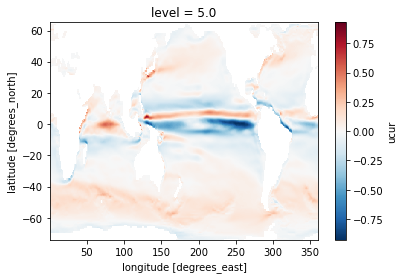

In [3]:
U.ucur.isel(level=0).mean('time').plot()

As you see, it is very simple to plot datasets with `xarray`, where you can take averages along dimensions with `mean()` and subset dimensions with `isel` (using th indices) or `sel` (using the values). See http://xarray.pydata.org/en/stable/plotting.html for much more background on plotting in xarray

If you want a somewhat nicer-looking figure, there are many ways in which you can tweak it. For example, for a different projection, use e.g.

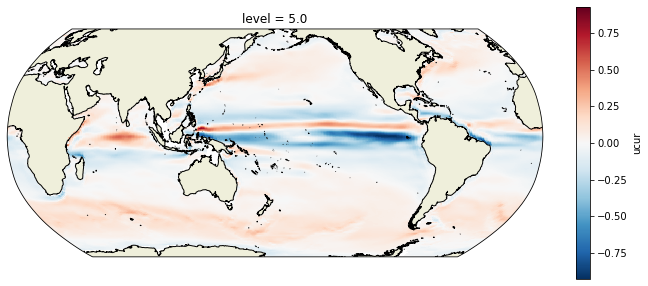

In [4]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

ax.coastlines(resolution='50m')
ax.add_feature(cfeature.LAND)
U.ucur.isel(level=0).mean('time').plot(ax=ax, transform=ccrs.PlateCarree())

### Assignment
**a)** Also open the `vcur` file and create a new variable `speed` with the following code
```
speed = np.hypot(U.ucur, V.vcur)
```
Then, create a plot of the surface speed. Where are the currents fastest? Where are they slowest? Try adjusting the color range by setting `vmin` and `vmax` in the plotting command. Or, if you want, try using a logarithmic color scale.

**b)** Adapt the code above to plot the standard deviation of the surface speed

**c)** How does the speed vary with depth? Explore this by creating a cross-section of speed at e.g. 180E (use `ax.invert_yaxis()` to flip the y-axis in the cross-section)

**d)** Use the xarray plotting to create a lineplot of the mean speed as a function of depth (use `y="level"` to swap the x and y axes so that depth is on the y-axis).